In [1]:
from bayes import Bayes         # for Bayes
import numpy as np              # for linspace
import scipy.stats as stats     # for binom, uniform
import matplotlib
import matplotlib.pyplot as plt # for plot
import random
%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

## Yesterday's Coin example

In [2]:
# here we're discretizing the heads probability p
p = np.linspace(0, 1, 101)

In [3]:
p

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [4]:
p_priors = { k:1/101 for k in p}

In [5]:
#p_priors

In [6]:
def coin_likelihood(data, p):
    # what is the likelihood of drawing data
    # given that the heads probability is p
    # data = 0 for tails, 1 for heads
    if data:
        return p
    return 1-p

In [7]:
bool(1)

True

In [8]:
bool(0)

False

Now create an instance of that same `Bayes` object from yesterday's sprint

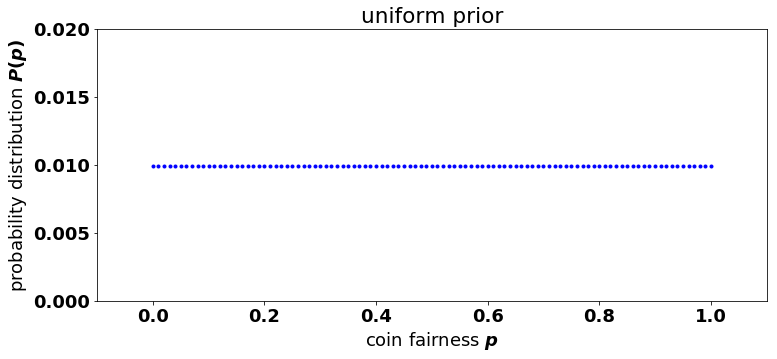

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
bayes = Bayes(p_priors.copy(), coin_likelihood)
bayes.plot(title="uniform prior", color='b', marker='.', linestyle='')
ax.set_ylim([0,0.02])
ax.set_xlim([-0.1,1.1])
ax.set_xlabel('coin fairness $p$')
ax.set_ylabel('probability distribution $P(p)$');

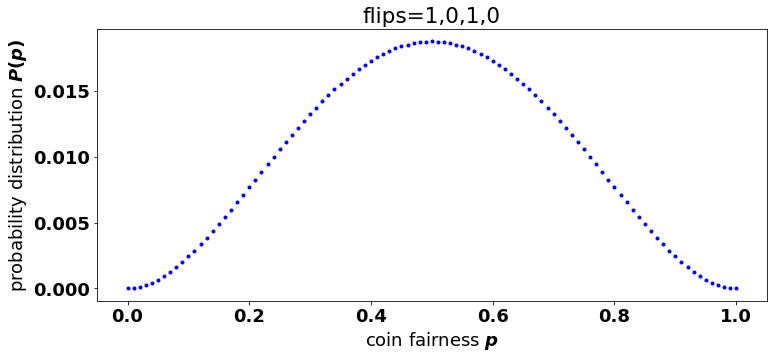

In [10]:
bayes.update(1) 
bayes.update(0) 
bayes.update(1)
bayes.update(0)

fig, ax = plt.subplots(figsize=(12,5))

bayes.plot(title="flips=1,0,1,0", color='b', marker='.', linestyle='')
plt.xlabel('coin fairness $p$')
plt.ylabel('probability distribution $P(p)$');

Let's create a function to do that nicely...

In [11]:
def feed_bayes_and_plot(bayes, data_sequence):
    N = len(data_sequence)
    
    fig, axs = plt.subplots(1, N, figsize=(16, 3))
    
    # for each new data point
    for i, ax in enumerate(axs.flatten()):
        bayes.update(data_sequence[i])
        sorted_keys = sorted(bayes.prior.keys())
        sorted_probs = [bayes.prior[key] for key in sorted_keys]
        ax.plot(sorted_keys, sorted_probs, color='b', marker='.', linestyle='')
        ax.set_title(",".join(map(str,data_sequence[0:i+1])))
        ax.get_yaxis().set_ticks([])
        if i==0:
            ax.set_ylabel('$P(p)$')
        ax.set_xlabel('$p$')

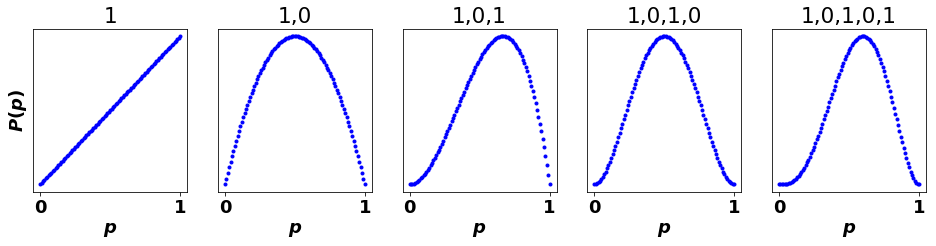

In [12]:
flips_A = [1,0,1,0,1]

bayesA = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesA, flips_A)

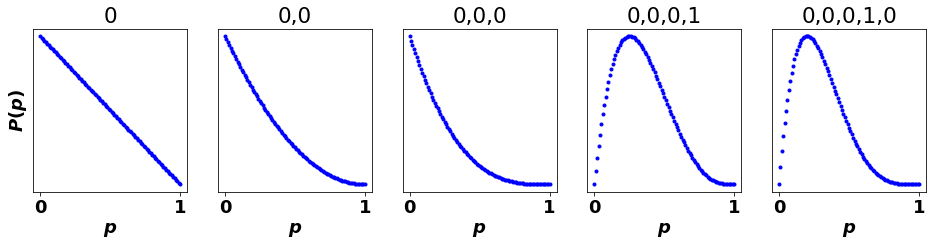

In [13]:
flips_B = [0,0,0,1,0]

bayesB = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesB, flips_B)

In [14]:
import scipy.stats as scs

In [15]:
clicks_A, views_A, clicks_B, views_B = 46, 100, 35, 100
# let's draw values from those distribution models
simulation_size = 10000

# model for A, fed with the right values
A_model = stats.beta(1 + clicks_A, 1 + views_A - clicks_A)

# model for B, fed with the right values
B_model = stats.beta(1 + clicks_B, 1 + views_B - clicks_B)

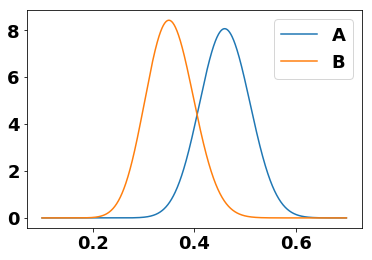

In [16]:
xx = np.linspace(0.1,.7,1000)
plt.plot(xx,A_model.pdf(xx), label='A')
plt.plot(xx,B_model.pdf(xx), label='B')
plt.legend();

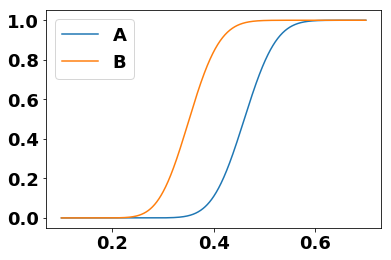

In [17]:
xx = np.linspace(0.1,.7,1000)
plt.plot(xx,A_model.cdf(xx), label='A')
plt.plot(xx,B_model.cdf(xx), label='B')
plt.legend();

In [18]:
A_sim = A_model.rvs(size=simulation_size) 
B_sim = B_model.rvs(size=simulation_size)

In [19]:
# let's find out the probability that A is better than B
print((A_sim > B_sim).mean())

# we can also find the probability that p_A is larger than p_B by 0.05
print((A_sim > (B_sim + 0.05)).mean())

0.9427
0.7996


## Coding tips for today's sprint

The quickest way to make your own discrete random variable: `np.random.choice` takes an array and a parameter `p` defining the probability of choosing each element in the array

In [20]:
np.random.choice(['a', 'b', 'c'], size=30, p=[0.8, 0.1, 0.1])

array(['b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'a',
       'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a'],
      dtype='<U1')

## Softmax

In [21]:
trials = np.array([23,44,12,15])
wins = np.array([5,5,4,6])

In [22]:
wins / trials

array([ 0.2173913 ,  0.11363636,  0.33333333,  0.4       ])

In [23]:
p_hat = wins/trials

In [24]:
tau = 0.1

In [25]:
norm = np.exp(p_hat/tau).sum()

In [26]:
probz = np.exp(p_hat/tau)/norm

In [27]:
probz

array([ 0.09300641,  0.03295421,  0.29651229,  0.57752709])

In [28]:
sum(probz)

1.0

In [29]:
np.unique(np.random.choice([0,1,2,3], p=probz, size=10000),
          return_counts=True)

(array([0, 1, 2, 3]), array([ 958,  321, 2984, 5737]))

## Bayesian one

In [30]:
wins

array([5, 5, 4, 6])

In [31]:
trials

array([23, 44, 12, 15])

In [32]:
p_hat

array([ 0.2173913 ,  0.11363636,  0.33333333,  0.4       ])

In [33]:
all_betas = stats.beta(1+wins, 1+trials-wins)

In [34]:
sims = all_betas.rvs()

In [35]:
sims

array([ 0.14140751,  0.17708089,  0.21891996,  0.3827459 ])

In [36]:
max(sims)

0.38274589977523382

In [37]:
np.argmax(sims)

3

Remember: you can use a list of indices to index a numpy array

In [38]:
foo = np.array([2,5,1,7,9,6,3,2,5,8])

In [39]:
foo

array([2, 5, 1, 7, 9, 6, 3, 2, 5, 8])

In [40]:
foo[[1,1,1,4, 4, 4, 4]]

array([5, 5, 5, 9, 9, 9, 9])

Boolean indexing / masking

In [41]:
bar = np.arange(10)

In [42]:
bar

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
foo

array([2, 5, 1, 7, 9, 6, 3, 2, 5, 8])

In [44]:
foo > bar

array([ True,  True, False,  True,  True,  True, False, False, False, False], dtype=bool)

In [45]:
np.mean(foo > bar)

0.5

In [46]:
np.sum(foo>bar)

5

In [47]:
mask = foo > bar

In [48]:
mask

array([ True,  True, False,  True,  True,  True, False, False, False, False], dtype=bool)

In [49]:
foo[mask]

array([2, 5, 7, 9, 6])

In [50]:
bar[mask]

array([0, 1, 3, 4, 5])

In [51]:
bar[~mask]

array([2, 6, 7, 8, 9])